In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

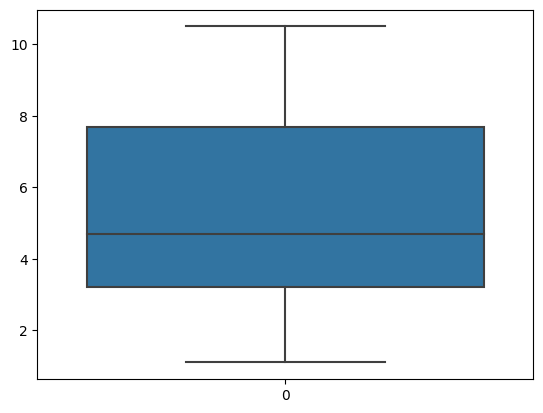

In [5]:
# Using box plot for YearsExperience
sns.boxplot(data['YearsExperience'])

<Axes: >

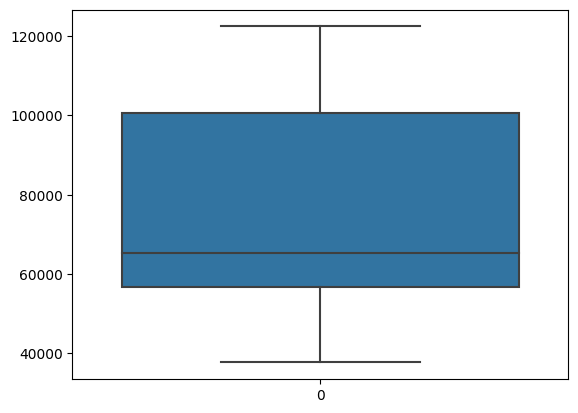

In [6]:
# Using box plot for Salary
sns.boxplot(data['Salary'])

# Checking if the variables are linearly related or not

<Axes: xlabel='YearsExperience', ylabel='Salary'>

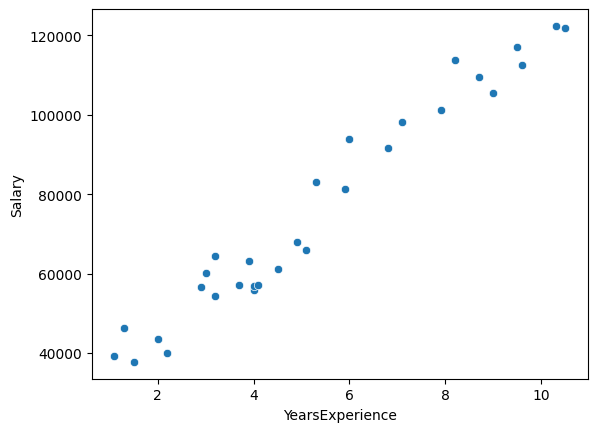

In [7]:
# Use scatter plot
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])

# Correlation

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model Building

In [9]:
# Import the statsmodel library
import statsmodels.formula.api as smf

In [10]:
# Use the OLS model
model = smf.ols('Salary ~ YearsExperience', data=data)
# Fit the model
model_fit = model.fit()

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        11:58:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predictions

In [12]:
# Check the model parameters(β0, β1)
model_fit.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
# Creating a series of yearsExperience with new values
new_data = pd.Series((5.2,2.3))
new_data
# Creating a DataFrame of new yearsExperience values
data_pred = pd.DataFrame(new_data, columns=['YearsExperience'])
data_pred

,YearsExperience
0,5.2
1,2.3


In [15]:
# Predicting the Salary using the new YearsExperience values
pred = model_fit.predict(data_pred)
pred

0    74932.004270
1    47527.113538
dtype: float64

In [16]:
pred1 = model_fit.predict(data.iloc[:,0])
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

# Checking the accuracy of predictons

In [17]:
# Finding the accuracy/ how good you model is prdicting
# Use RMSE(Root Mean Squared Error)
mse1 = np.mean((np.array(data['Salary'])-np.array(pred1))**2)
print('MSE1 =', mse1)
rmse1 = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred1))**2))
print('RMSE1 =', rmse1)

MSE1 = 31270951.72228097
RMSE1 = 5592.043608760662


# Applying the Transformations

<Axes: xlabel='YearsExperience', ylabel='Salary'>

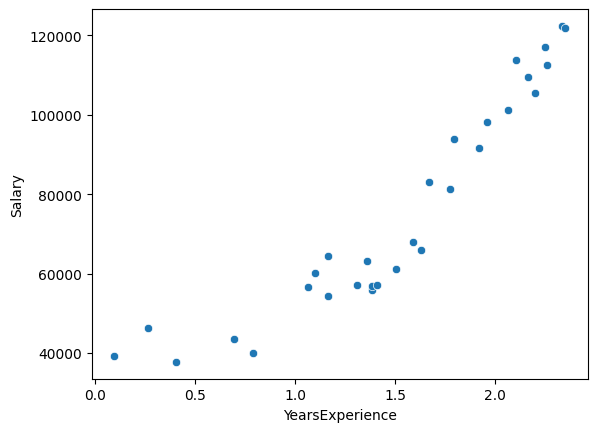

In [18]:
# Model building on Transformed Data
# x = log(YearsExperience); y = Salary
sns.scatterplot(x = np.log(data['YearsExperience']), y = data['Salary'])

In [19]:
model2 = smf.ols('Salary ~ np.log(YearsExperience)', data= data)
model_fit1 = model2.fit()

In [20]:
model_fit1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [21]:
pred2 = model_fit1.predict(data.iloc[:,0])
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [22]:
# Use RMSE(Root Mean Squared Error)
mse2 = np.mean((np.array(data['Salary'])-np.array(pred2))**2)
print('MSE2 =', mse2)
rmse2 = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred2))**2))
print('RMSE2 =', rmse2)

MSE2 = 106149618.72183882
RMSE2 = 10302.893706228306


<Axes: xlabel='YearsExperience', ylabel='Salary'>

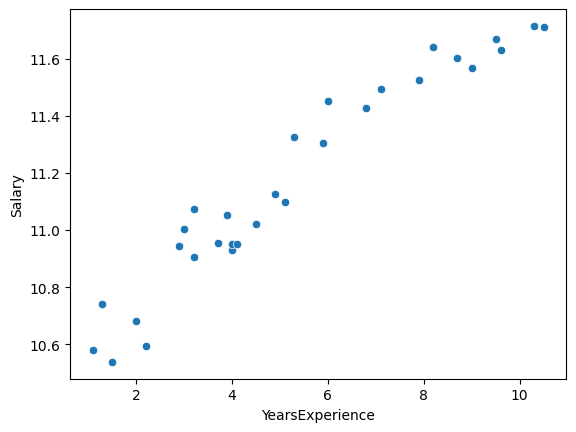

In [23]:
# x = Sorting_Time; y = log(Delivery_Time)
sns.scatterplot(x = data['YearsExperience'], y = np.log(data['Salary']))

In [24]:
model3  = smf.ols('np.log(Salary) ~ YearsExperience', data = data)
model_fit3 = model3.fit()
model_fit3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [25]:
pred3 = model_fit3.predict(data.iloc[:,0])
pred3_final = np.exp(pred3)
pred3_final

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [26]:
# Use RMSE(Root Mean Squared Error)
mse3 = np.mean((np.array(data['Salary'])-np.array(pred3_final))**2)
print('MSE3 =', mse3)
rmse3 = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred3_final))**2))
print('RMSE3 =', rmse3)

MSE3 = 52030760.27058356
RMSE3 = 7213.235076620168


# Polynomial Transformation

In [27]:
# x = YearsExperience; x^2 = YearsExperience*YearsExperience; y = log(Salary)
model4 = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience*YearsExperience)', data = data)
model_fit4 = model4.fit()
model_fit4.params

Intercept                               10.336852
YearsExperience                          0.202382
I(YearsExperience * YearsExperience)    -0.006614
dtype: float64

In [28]:
pred4 = model_fit4.predict(data.iloc[:,0])
pred4_final = np.exp(pred4)
pred4_final

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

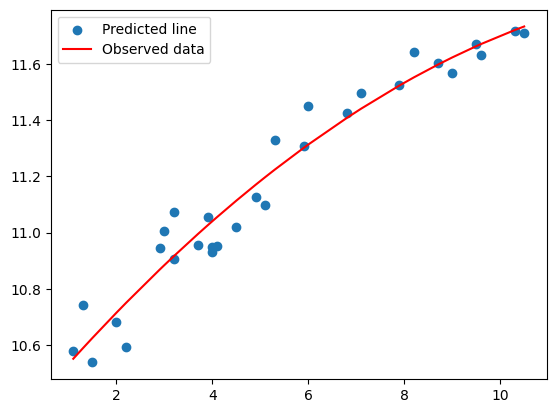

In [29]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:,0:1].values
X_poly = poly_reg.fit_transform(X)
# y = data.iloc[:, 1].values

plt.scatter(data.YearsExperience, np.log(data.Salary))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [30]:
# Use RMSE(Root Mean Squared Error)
mse4 = np.mean((np.array(data['Salary'])-np.array(pred4_final))**2)
print('MSE4 =', mse4)
rmse4 = np.sqrt(np.mean((np.array(data['Salary'])-np.array(pred4_final))**2))
print('RMSE4 =', rmse4)

MSE4 = 29063760.631258003
RMSE4 = 5391.081582693588


In [31]:
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,5592.043609
1,Log model,10302.893706
2,Exp model,7213.235077
3,Poly model,5391.081583
